In [177]:
import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import explained_variance_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, SimpleRNN, RNN, GRU, Flatten, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from keras import initializers

In [198]:
path = "./dataset/Baron_dataset"
file = ["2015-08-07","2015-08-08","2015-09-03","2015-09-09","2015-09-11"]
dfs = []
for i in range(5):
    filenames = glob.glob(path + "/" + file[i] + "/*.txt")
    cols = []
    for filename in filenames:
        cols.append(pd.read_csv(filename, index_col=None, header=None))
    df = pd.DataFrame(pd.concat(cols, axis=1, ignore_index=None))
    df.columns = ['AIRGAP1' , 'AIRGAP2' , 'AIRGAP3' , 'AIRGAP4' , 'CURRENT_DEPTH1' ,
              'CURRENT_DEPTH2' , 'CURRENT_DEPTH3' , 'CURRENT_DEPTH4' , 'CURRENT_DEPTH5' ,
              'CURRENT_DEPTH6' , 'CURRENT_DEPTH7' , 'CURRENT_DIRECTION1' , 'CURRENT_DIRECTION2' , 
              'CURRENT_DIRECTION3' , 'CURRENT_DIRECTION4' , 'CURRENT_DIRECTION5' , 'CURRENT_DIRECTION6' , 
              'CURRENT_DIRECTION7' , 'CURRENT_SPEED1' , 'CURRENT_SPEED2' , 'CURRENT_SPEED3' , 'CURRENT_SPEED4' ,
              'CURRENT_SPEED5' , 'CURRENT_SPEED6' , 'CURRENT_SPEED7' , 'MOORING1_LENGTH',  'MOORING1_TENSION1' ,
              'MOORING1_TENSION2' , 'MOORING2_LENGTH' , 'MOORING2_TENSION1' , 'MOORING2_TENSION2' ,
              'MOORING3_LENGTH' , 'MOORING3_TENSION1' , 'MOORING3_TENSION2' , 'MOORING4_LENGTH' ,
              'MOORING4_TENSION1' , 'MOORING4_TENSION2' , 'MOORING5_LENGTH' , 'MOORING5_TENSION1' ,
              'MOORING5_TENSION2' , 'MOORING6_LENGTH' , 'MOORING6_TENSION1' , 'MOORING6_TENSION2' ,
              'MOORING7_LENGTH' , 'MOORING7_TENSION1' , 'MOORING7_TENSION2' , 'MOORING8_LENGTH' , 
              'MOORING8_TENSION1' , 'MOORING8_TENSION2' , 'MOORING9_LENGTH' , 'MOORING9_TENSION1' ,
              'MOORING9_TENSION2' , 'MOTION_TILTX' , 'MOTION_TILTY' , 'MOTION_YAW' , 'POSITION_X' ,
              'POSITION_Y' , 'WIND1_DIRECTION' , 'WIND1_SPEED' , 'WIND2_DIRECTION' , 'WIND2_SPEED']
    df = df.drop(['CURRENT_DEPTH1' , 'CURRENT_DEPTH2' , 'CURRENT_DEPTH3' , 'CURRENT_DEPTH4' ,
                'CURRENT_DEPTH5' , 'CURRENT_DEPTH6' , 'CURRENT_DEPTH7','MOORING1_LENGTH','MOORING2_LENGTH','MOORING3_LENGTH','MOORING4_LENGTH','MOORING5_LENGTH','MOORING6_LENGTH','MOORING7_LENGTH','MOORING8_LENGTH','MOORING9_LENGTH'],axis=1)
    dfs.append(df)
df1 = dfs[0]
df2 = dfs[1]
df3 = dfs[2]
df4 = dfs[3]
df5 = dfs[4]

<AxesSubplot:>

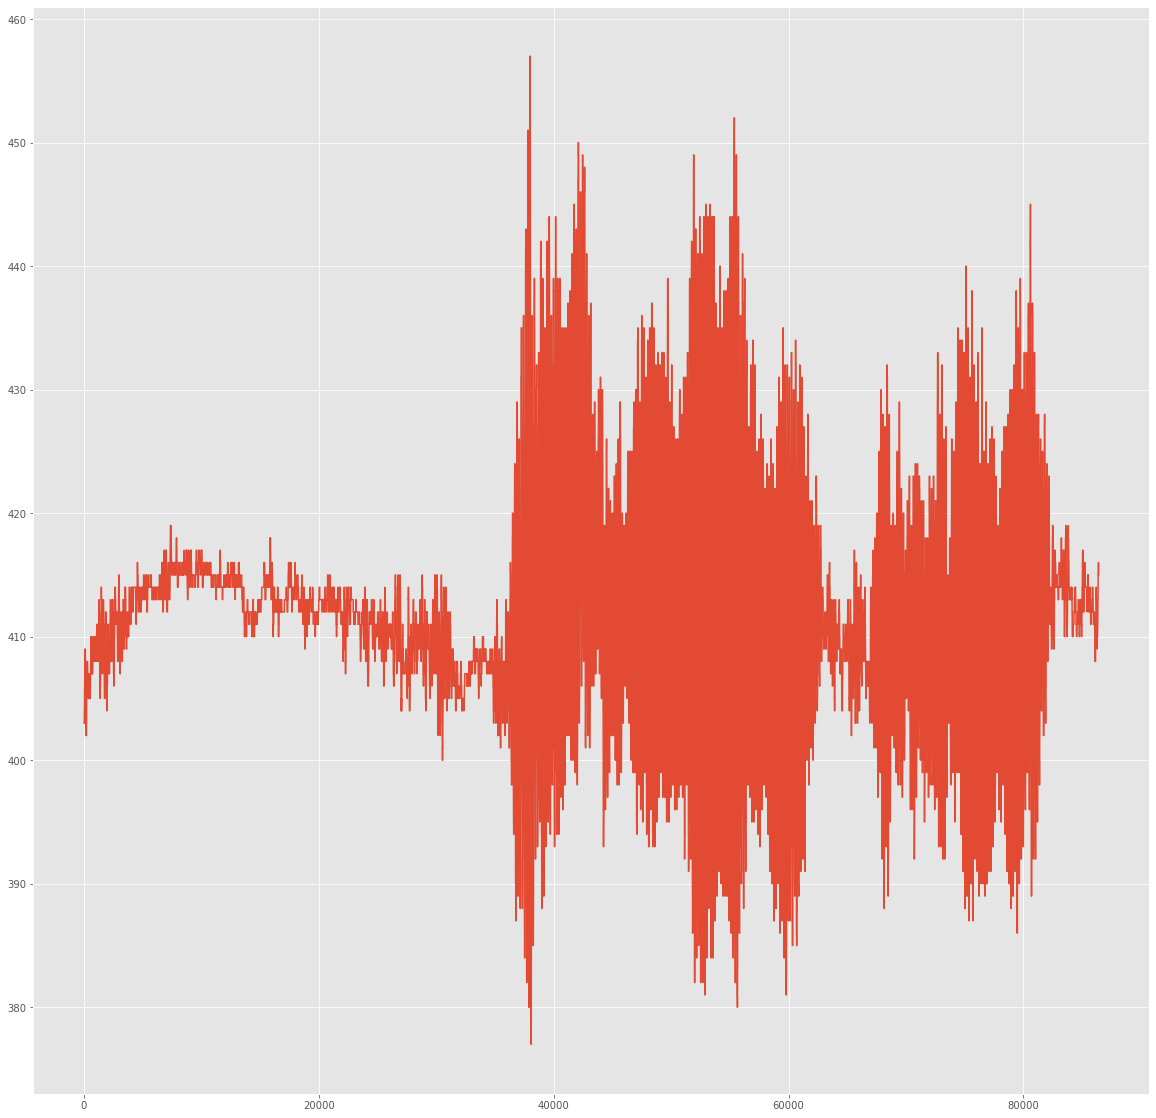

In [79]:
plt.figure(figsize = (20, 20))
df1['MOORING1_TENSION1'].plot()

In [199]:
x = df1.drop(['MOORING1_TENSION1'], axis = 1)
y = df1['MOORING1_TENSION1']

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x.columns = ['AIRGAP1', 'AIRGAP2', 'AIRGAP3', 'AIRGAP4', 'CURRENT_DIRECTION1',
       'CURRENT_DIRECTION2', 'CURRENT_DIRECTION3', 'CURRENT_DIRECTION4',
       'CURRENT_DIRECTION5', 'CURRENT_DIRECTION6', 'CURRENT_DIRECTION7',
       'CURRENT_SPEED1', 'CURRENT_SPEED2', 'CURRENT_SPEED3', 'CURRENT_SPEED4',
       'CURRENT_SPEED5', 'CURRENT_SPEED6', 'CURRENT_SPEED7',
       'MOORING1_TENSION2', 'MOORING2_TENSION1', 'MOORING2_TENSION2',
       'MOORING3_TENSION1', 'MOORING3_TENSION2', 'MOORING4_TENSION1',
       'MOORING4_TENSION2', 'MOORING5_TENSION1', 'MOORING5_TENSION2',
       'MOORING6_TENSION1', 'MOORING6_TENSION2', 'MOORING7_TENSION1',
       'MOORING7_TENSION2', 'MOORING8_TENSION1', 'MOORING8_TENSION2',
       'MOORING9_TENSION1', 'MOORING9_TENSION2', 'MOTION_TILTX',
       'MOTION_TILTY', 'MOTION_YAW', 'POSITION_X', 'POSITION_Y',
       'WIND1_DIRECTION', 'WIND1_SPEED', 'WIND2_DIRECTION', 'WIND2_SPEED']

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = .2,
                                                   random_state = 100,
                                                   shuffle = False)

In [200]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(69120, 44) (17280, 44)
(69120,) (17280,)


## Model1 ( LSTM )

In [112]:
# Modeling

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (44, 1)))
model.add(BatchNormalization())  ## 첫번째 레이어의 가중치를 모아주는 역할
model.add(Dropout(0.2))
model.add(LSTM(units = 64, return_sequences = False))
model.add(BatchNormalization())  ## 세번째 레이어의 가중치를 모아주는 역할
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))


model.compile(loss = 'mse',
             optimizer = 'adam',
             metrics = ['mae'])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 44, 50)            10400     
                                                                 
 batch_normalization_8 (Batc  (None, 44, 50)           200       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 44, 50)            0         
                                                                 
 lstm_35 (LSTM)              (None, 64)                29440     
                                                                 
 batch_normalization_9 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 flatten_8 (Flatten)         (None, 64)              

In [113]:
hist = model.fit(x_train.values,
                y_train.values,
                epochs = 40,
                validation_data = (x_test, y_test),
                batch_size = 128)

Epoch 1/40
540/540 [==============================] - 8s 12ms/step - loss: 42319.0352 - mae: 147.5936 - val_loss: 1136.1787 - val_mae: 32.0530
Epoch 2/40
540/540 [==============================] - 6s 11ms/step - loss: 2612.3997 - mae: 35.5723 - val_loss: 53.4653 - val_mae: 5.7338
Epoch 3/40
540/540 [==============================] - 6s 11ms/step - loss: 3162.3059 - mae: 37.5314 - val_loss: 1612.6720 - val_mae: 39.1593
Epoch 4/40
540/540 [==============================] - 6s 11ms/step - loss: 2267.5151 - mae: 33.4695 - val_loss: 149.3445 - val_mae: 10.6411
Epoch 5/40
540/540 [==============================] - 6s 10ms/step - loss: 1117.4080 - mae: 25.6404 - val_loss: 207.7274 - val_mae: 12.8851
Epoch 6/40
540/540 [==============================] - 6s 10ms/step - loss: 1060.9651 - mae: 25.6987 - val_loss: 353.4136 - val_mae: 13.2499
Epoch 7/40
540/540 [==============================] - 5s 10ms/step - loss: 1690.8630 - mae: 29.5702 - val_loss: 77.0471 - val_mae: 7.2120
Epoch 8/40
540/540 [

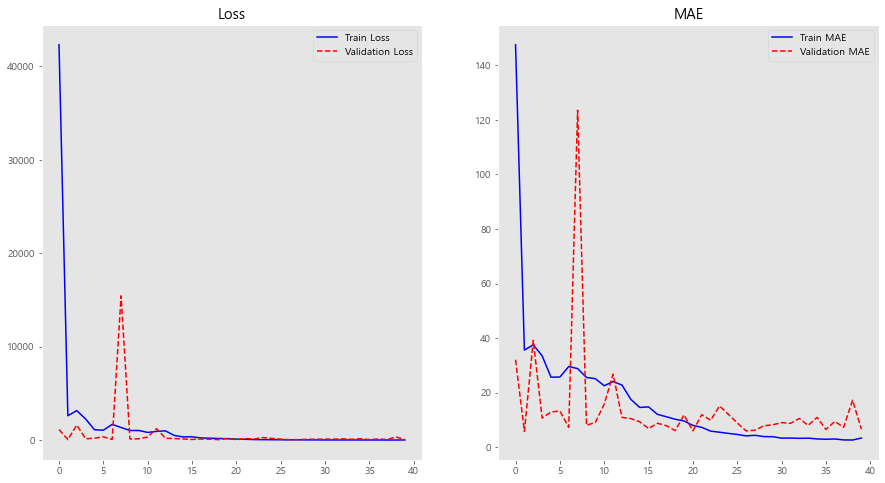

In [114]:
plt.figure(figsize = (15, 8))
epochs = range(40)

plt.subplot(1, 2, 1)
plt.plot(epochs, hist.history['loss'], 'b-', label = 'Train Loss')
plt.plot(epochs, hist.history['val_loss'], 'r--', label = 'Validation Loss')
plt.grid()
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, hist.history['mae'], 'b-', label = 'Train MAE')
plt.plot(epochs, hist.history['val_mae'], 'r--', label = 'Validation MAE')
plt.grid()
plt.legend()
plt.title('MAE')

plt.show()

In [115]:
pred = model.predict(x_test)
pred

array([[411.50204],
       [411.19278],
       [411.13885],
       ...,
       [403.79407],
       [403.70337],
       [403.8065 ]], dtype=float32)

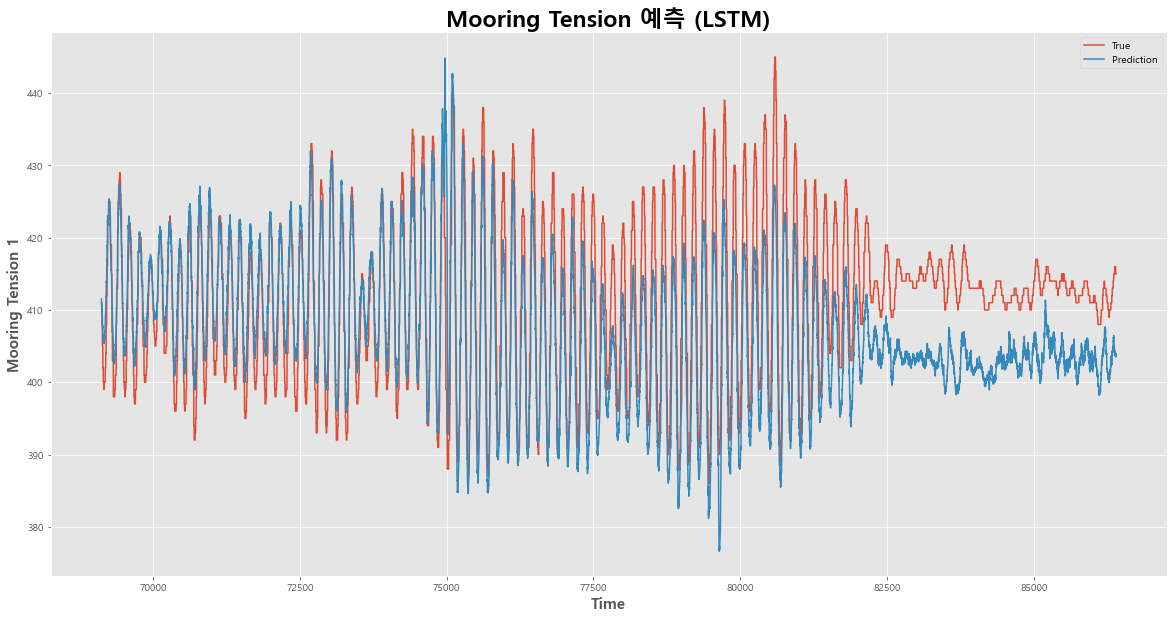

In [142]:
fig = plt.figure(figsize = (20, 10))

ax = fig.add_subplot(111)
ax.plot(x_test.index, y_test, label = 'True')
ax.plot(x_test.index, pred, label = 'Prediction')
plt.title('Mooring Tension 예측 (LSTM)', fontdict = {
    'size' : 23,
    'weight' : 'bold',
    'color' : 'k'
})
plt.legend()
plt.xlabel('Time', fontdict = {
    'weight' : 'bold',
    'size' : 15
})
plt.ylabel('Mooring Tension 1',
          fontdict = {
              'weight' : 'bold',
              'size' : 15
          })
plt.show()

## Model2 ( GRU )

In [106]:
# Modeling

model2 = Sequential()
model2.add(GRU(units = 50, return_sequences = True, input_shape = (44, 1)))
model2.add(BatchNormalization())  ## 첫번째 레이어의 가중치를 모아주는 역할
model2.add(Dropout(0.2))
model2.add(GRU(units = 64, return_sequences = False))
model2.add(BatchNormalization())  ## 세번째 레이어의 가중치를 모아주는 역할
model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(1, activation = 'linear'))


model2.compile(loss = 'mse',
             optimizer = 'adam',
             metrics = ['mae'])

model2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 44, 50)            7950      
                                                                 
 batch_normalization_6 (Batc  (None, 44, 50)           200       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 44, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 64)                22272     
                                                                 
 batch_normalization_7 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 flatten_7 (Flatten)         (None, 64)              

In [108]:
hist2 = model2.fit(x_train.values,
                y_train.values,
                epochs = 40,
                validation_data = (x_test, y_test),
                batch_size = 128)

Epoch 1/40
540/540 [==============================] - 5s 8ms/step - loss: 45.6015 - mae: 5.2844 - val_loss: 301.4981 - val_mae: 15.7465
Epoch 2/40
540/540 [==============================] - 5s 8ms/step - loss: 48.2743 - mae: 5.3326 - val_loss: 256.0999 - val_mae: 14.2588
Epoch 3/40
540/540 [==============================] - 5s 8ms/step - loss: 34.4830 - mae: 4.5926 - val_loss: 120.5375 - val_mae: 8.9153
Epoch 4/40
540/540 [==============================] - 5s 8ms/step - loss: 28.8994 - mae: 4.1898 - val_loss: 440.2185 - val_mae: 19.7441
Epoch 5/40
540/540 [==============================] - 5s 9ms/step - loss: 29.7522 - mae: 4.2187 - val_loss: 487.7105 - val_mae: 20.9189
Epoch 6/40
540/540 [==============================] - 5s 9ms/step - loss: 26.0912 - mae: 3.9510 - val_loss: 61.3422 - val_mae: 6.5380
Epoch 7/40
540/540 [==============================] - 5s 9ms/step - loss: 26.3253 - mae: 3.9678 - val_loss: 69.4229 - val_mae: 7.0720
Epoch 8/40
540/540 [==============================] -

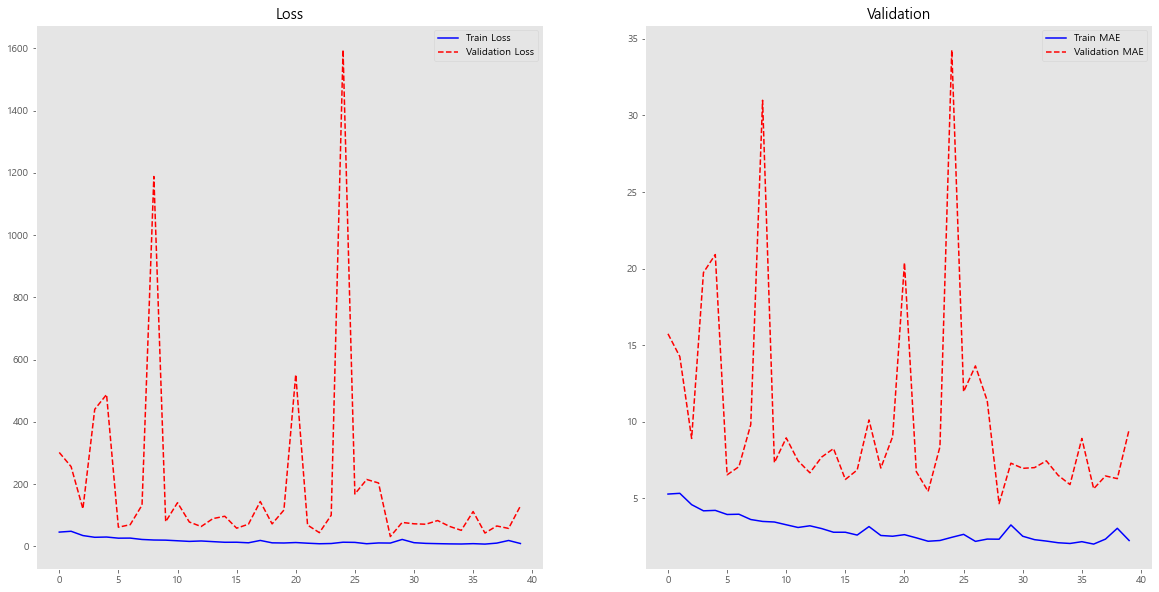

In [111]:
plt.figure(figsize = (20, 10))
epochs = range(40)

plt.subplot(1, 2, 1)
plt.plot(epochs, hist2.history['loss'], 'b-', label = 'Train Loss')
plt.plot(epochs, hist2.history['val_loss'], 'r--', label = 'Validation Loss')
plt.title('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, hist2.history['mae'], 'b-', label = 'Train MAE')
plt.plot(epochs, hist2.history['val_mae'], 'r--', label = 'Validation MAE')
plt.title('Validation')
plt.grid()
plt.legend()

plt.show()

In [138]:
pred2 = model2.predict(x_test)
pred2

array([[407.6425 ],
       [407.6977 ],
       [407.2099 ],
       ...,
       [397.32462],
       [397.68686],
       [397.7631 ]], dtype=float32)

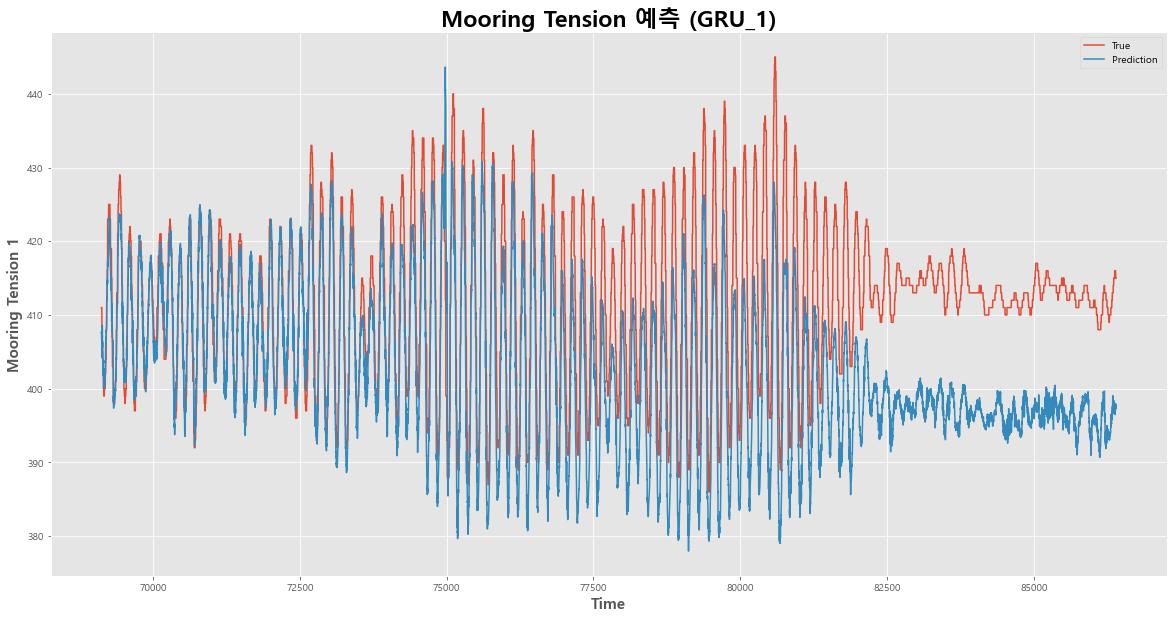

In [223]:
fig = plt.figure(figsize = (20, 10))

ax = fig.add_subplot(111)
ax.plot(x_test.index, y_test, label = 'True')
ax.plot(x_test.index, pred2, label = 'Prediction')
plt.title('Mooring Tension 예측 (GRU_1)', fontdict = {
    'size' : 23,
    'weight' : 'bold',
    'color' : 'k'
})
plt.legend()
plt.xlabel('Time', fontdict = {
    'weight' : 'bold',
    'size' : 15
})
plt.ylabel('Mooring Tension 1',
          fontdict = {
              'weight' : 'bold',
              'size' : 15
          })
plt.show()

## Model3 ( CNN + LSTM )

* Source : https://machinelearningmastery.com/cnn-long-short-term-memory-networks/

In [119]:
subsequences = 2
timesteps = x_train.shape[1]//subsequences

x_train_sub = x_train.values.reshape((x_train.shape[0], subsequences, timesteps, 1))
x_test_sub = x_test.values.reshape((x_test.shape[0], subsequences, timesteps, 1))

In [121]:
print(x_train_sub.shape, x_test_sub.shape)

(69120, 2, 22, 1) (17280, 2, 22, 1)


In [127]:
model3 = Sequential()
model3.add(TimeDistributed(Conv1D(filters = 64, kernel_size = 1, activation = 'relu'), 
                           input_shape = (None, x_train_sub.shape[2], x_train_sub.shape[3])))
model3.add(TimeDistributed(MaxPooling1D(pool_size = 2)))
model3.add(TimeDistributed(Flatten()))
model3.add(LSTM(50, activation = 'relu'))
model3.add(Dense(1, activation = 'linear'))

model3.compile(loss = 'mean_squared_error', 
               optimizer = 'adam', 
              metrics = ['mse'])

model3.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_5 (TimeDis  (None, None, 22, 64)     128       
 tributed)                                                       
                                                                 
 time_distributed_6 (TimeDis  (None, None, 11, 64)     0         
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, None, 704)        0         
 tributed)                                                       
                                                                 
 lstm_37 (LSTM)              (None, 50)                151000    
                                                                 
 dense_30 (Dense)            (None, 1)                 51        
                                                     

In [128]:
hist3 = model3.fit(x_train_sub,
                  y_train,
                  epochs = 20,
                  batch_size = 128,
                  validation_data = (x_test_sub, y_test))

Epoch 1/20
540/540 [==============================] - 4s 6ms/step - loss: 21075.1895 - mse: 21075.1895 - val_loss: 48.3780 - val_mse: 48.3780
Epoch 2/20
540/540 [==============================] - 3s 6ms/step - loss: 49.0993 - mse: 49.0993 - val_loss: 27.5665 - val_mse: 27.5665
Epoch 3/20
540/540 [==============================] - 3s 6ms/step - loss: 31.7041 - mse: 31.7041 - val_loss: 29.3257 - val_mse: 29.3257
Epoch 4/20
540/540 [==============================] - 3s 6ms/step - loss: 26.4659 - mse: 26.4659 - val_loss: 20.0769 - val_mse: 20.0769
Epoch 5/20
540/540 [==============================] - 3s 6ms/step - loss: 23.4583 - mse: 23.4583 - val_loss: 17.3767 - val_mse: 17.3767
Epoch 6/20
540/540 [==============================] - 3s 6ms/step - loss: 21.6555 - mse: 21.6555 - val_loss: 16.3422 - val_mse: 16.3422
Epoch 7/20
540/540 [==============================] - 3s 6ms/step - loss: 20.1045 - mse: 20.1045 - val_loss: 15.4741 - val_mse: 15.4741
Epoch 8/20
540/540 [======================

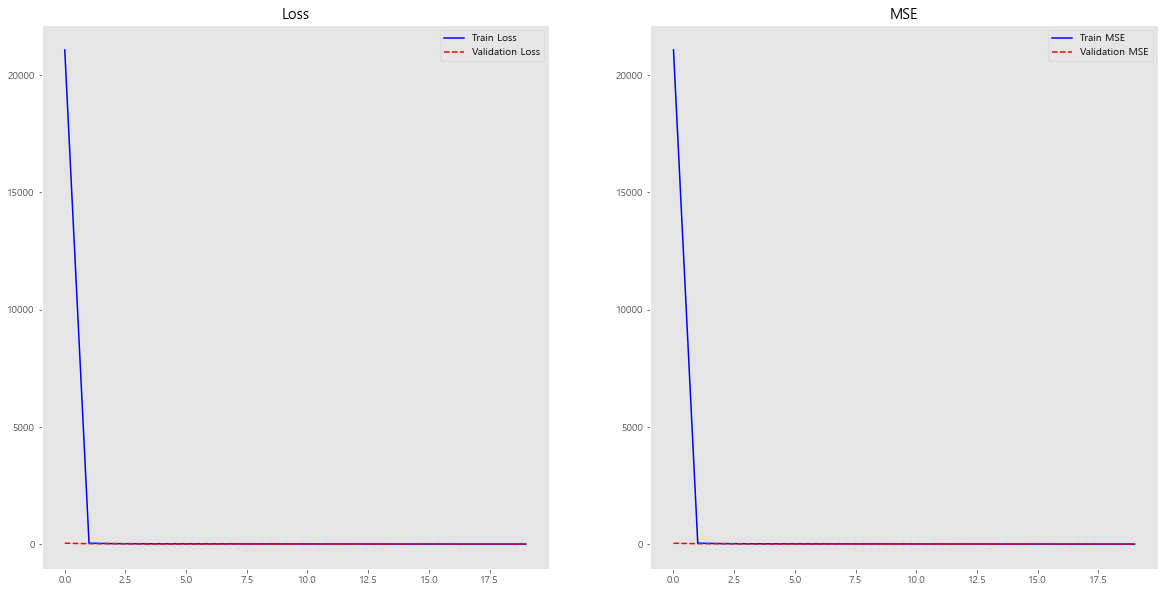

In [133]:
plt.figure(figsize = (20, 10))
epochs = range(20)

plt.subplot(1, 2, 1)
plt.plot(epochs, hist3.history['loss'], 'b-', label = 'Train Loss')
plt.plot(epochs, hist3.history['val_loss'], 'r--', label = 'Validation Loss')
plt.title('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, hist3.history['mse'], 'b-', label = 'Train MSE')
plt.plot(epochs, hist3.history['val_mse'], 'r--', label = 'Validation MSE')
plt.title('MSE')
plt.grid()
plt.legend()

plt.show()

In [136]:
pred3 = model3.predict(x_test_sub)
pred3

array([[408.82178],
       [408.96985],
       [408.99387],
       ...,
       [421.61053],
       [422.35156],
       [422.1089 ]], dtype=float32)

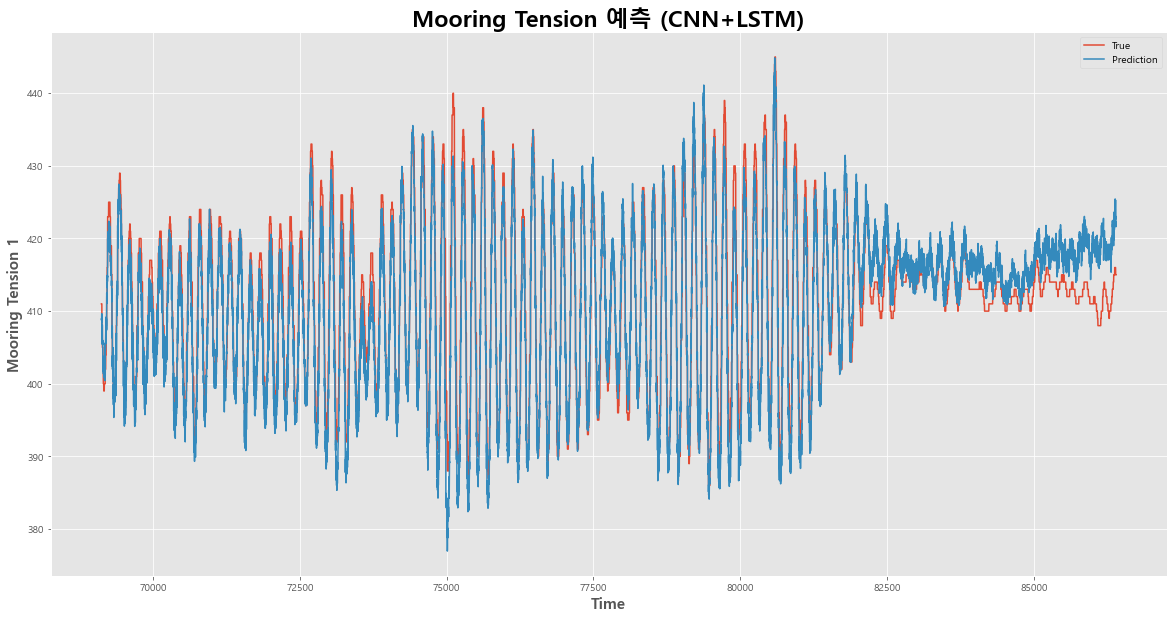

In [140]:
fig = plt.figure(figsize = (20, 10))

ax = fig.add_subplot(111)
ax.plot(x_test.index, y_test, label = 'True')
ax.plot(x_test.index, pred3, label = 'Prediction')
plt.title('Mooring Tension 예측 (CNN+LSTM)', fontdict = {
    'size' : 23,
    'weight' : 'bold',
    'color' : 'k'
})
plt.legend()
plt.xlabel('Time', fontdict = {
    'weight' : 'bold',
    'size' : 15
})
plt.ylabel('Mooring Tension 1',
          fontdict = {
              'weight' : 'bold',
              'size' : 15
          })
plt.show()

## Model4 ( IRNN )
- [A Simple Way to Initialize Recurrent Networks of Rectified Linear Units](https://arxiv.org/pdf/1504.00941.pdf)을 통해 발표된 IRNN을 적용

<br>

### 결과
- 학습시간이 너무 오래 걸림 + 만족할만한 성능을 내지 못하여 도중에 중단

In [160]:
x_train_irnn = x_train.values.reshape(x_train.shape[0], -1, 1)
x_test_irnn = x_test.values.reshape(x_test.shape[0], -1, 1)

In [161]:
x_test_irnn.shape

(17280, 44, 1)

In [194]:
model4 = Sequential()
model4.add(SimpleRNN(100,
                     kernel_initializer = initializers.RandomNormal(stddev = 0.001),
                     recurrent_initializer = initializers.Identity(gain = 1.0),
                     activation = 'relu',
                     input_shape = x_train_irnn.shape[1:]))
model4.add(BatchNormalization())

model4.add(Flatten())
model4.add(Dense(32))
model4.add(Activation('relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1))
model4.add(Activation('linear'))

rmsprop = RMSprop(lr = 1e-6)

model4 .compile(loss = 'mse',
                optimizer = rmsprop,
              metrics = ['mae'])

model4.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_30 (SimpleRNN)   (None, 100)               10200     
                                                                 
 batch_normalization_15 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 flatten_11 (Flatten)        (None, 100)               0         
                                                                 
 dense_33 (Dense)            (None, 32)                3232      
                                                                 
 activation_2 (Activation)   (None, 32)                0         
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                     

C:\Users\User\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [195]:
model4.fit(x_train_irnn,
          y_train,
          batch_size = 32,
          epochs = 3,
          verbose = 1,
          validation_data = (x_test_irnn, y_test))

Epoch 1/3
2160/2160 [==============================] - 81s 37ms/step - loss: 168988.0781 - mae: 410.9545 - val_loss: 168302.6719 - val_mae: 410.0965
Epoch 2/3
2160/2160 [==============================] - 73s 34ms/step - loss: 167566.2812 - mae: 409.2206 - val_loss: 167993.9531 - val_mae: 409.7210
Epoch 3/3
 127/2160 [>.............................] - ETA: 1:06 - loss: 167253.6719 - mae: 408.8339

KeyboardInterrupt: 

## Model5 ( GRU ver2. )

In [215]:
model_gru = Sequential()
model_gru.add(GRU(50, activation = 'relu', return_sequences = True, input_shape = (44, 1)))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(60, activation = 'relu', return_sequences = True))
model_gru.add(GRU(80, activation = 'relu', return_sequences = True))
model_gru.add(GRU(100, activation = 'relu'))

model_gru.add(Dense(1, activation = 'relu'))
model_gru.compile(loss = 'mean_squared_error',
             optimizer = 'adam',
             metrics = ['mae'])

model_gru.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_52 (GRU)                (None, 44, 50)            7950      
                                                                 
 dropout_32 (Dropout)        (None, 44, 50)            0         
                                                                 
 gru_53 (GRU)                (None, 44, 60)            20160     
                                                                 
 gru_54 (GRU)                (None, 44, 80)            34080     
                                                                 
 gru_55 (GRU)                (None, 100)               54600     
                                                                 
 dense_37 (Dense)            (None, 1)                 101       
                                                                 
Total params: 116,891
Trainable params: 116,891
Non-t

In [216]:
hist_ = model_gru.fit(x_train, y_train,
                     epochs = 5,
                     batch_size = 32,
                     validation_data = (x_test, y_test))

Epoch 1/5
2160/2160 [==============================] - 707s 327ms/step - loss: 2395.4551 - mae: 13.0693 - val_loss: 52.5633 - val_mae: 5.8418
Epoch 2/5
2160/2160 [==============================] - 644s 298ms/step - loss: 49.4925 - mae: 5.3819 - val_loss: 56.2206 - val_mae: 6.3817
Epoch 3/5
2160/2160 [==============================] - 656s 304ms/step - loss: 21.1838 - mae: 3.5959 - val_loss: 23.5374 - val_mae: 3.9383
Epoch 4/5
2160/2160 [==============================] - 653s 302ms/step - loss: 18.9713 - mae: 3.4033 - val_loss: 14.7447 - val_mae: 3.0360
Epoch 5/5
2160/2160 [==============================] - 687s 318ms/step - loss: 15.5705 - mae: 3.0799 - val_loss: 31.1912 - val_mae: 4.5423


In [217]:
hist_.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

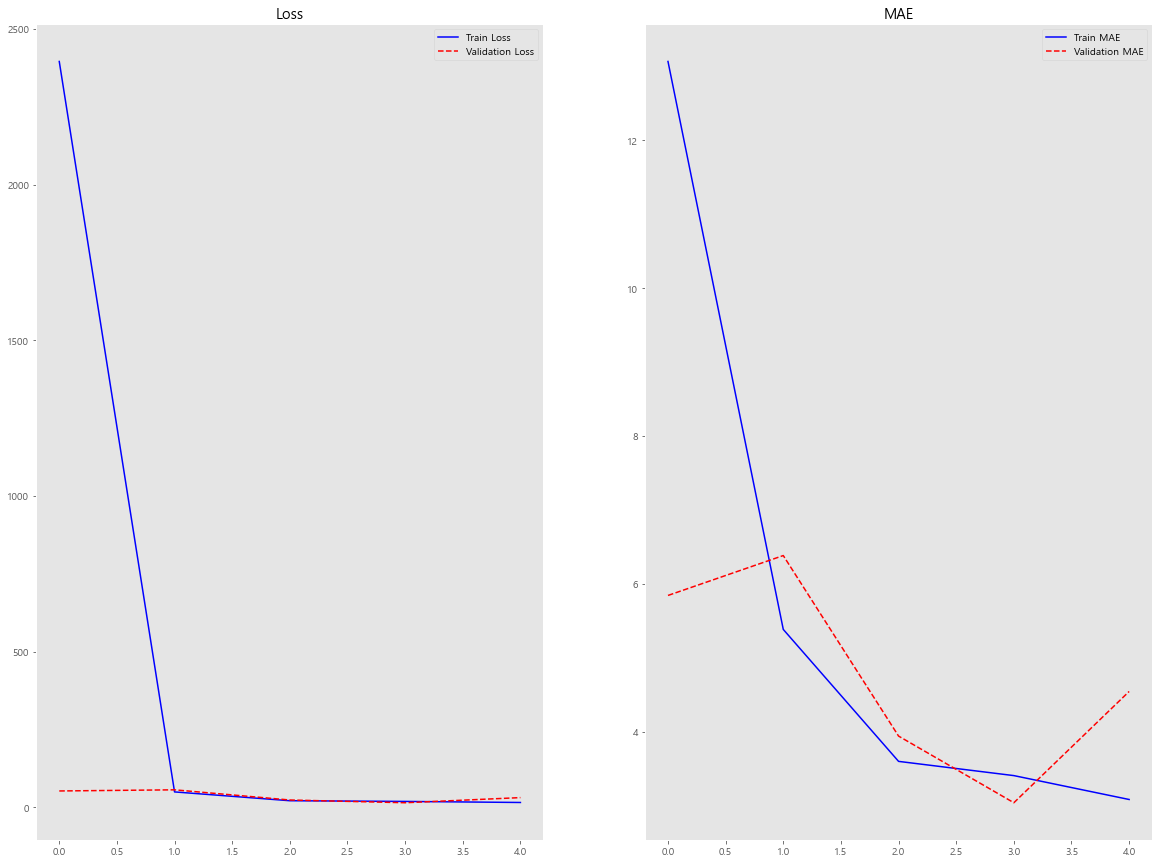

In [219]:
epochs = range(5)
plt.figure(figsize = (20, 15))

plt.subplot(1, 2, 1)
plt.plot(epochs, hist_.history['loss'], 'b-', label = 'Train Loss')
plt.plot(epochs, hist_.history['val_loss'] ,  'r--', label = 'Validation Loss')
plt.title('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, hist_.history['mae'], 'b-', label = 'Train MAE')
plt.plot(epochs, hist_.history['val_mae'] ,  'r--', label = 'Validation MAE')
plt.title('MAE')
plt.grid()
plt.legend()

plt.show()

In [220]:
pred_ = model_gru.predict(x_test)
pred_

array([[408.13342],
       [407.63153],
       [407.67413],
       ...,
       [405.48547],
       [407.2139 ],
       [407.13818]], dtype=float32)

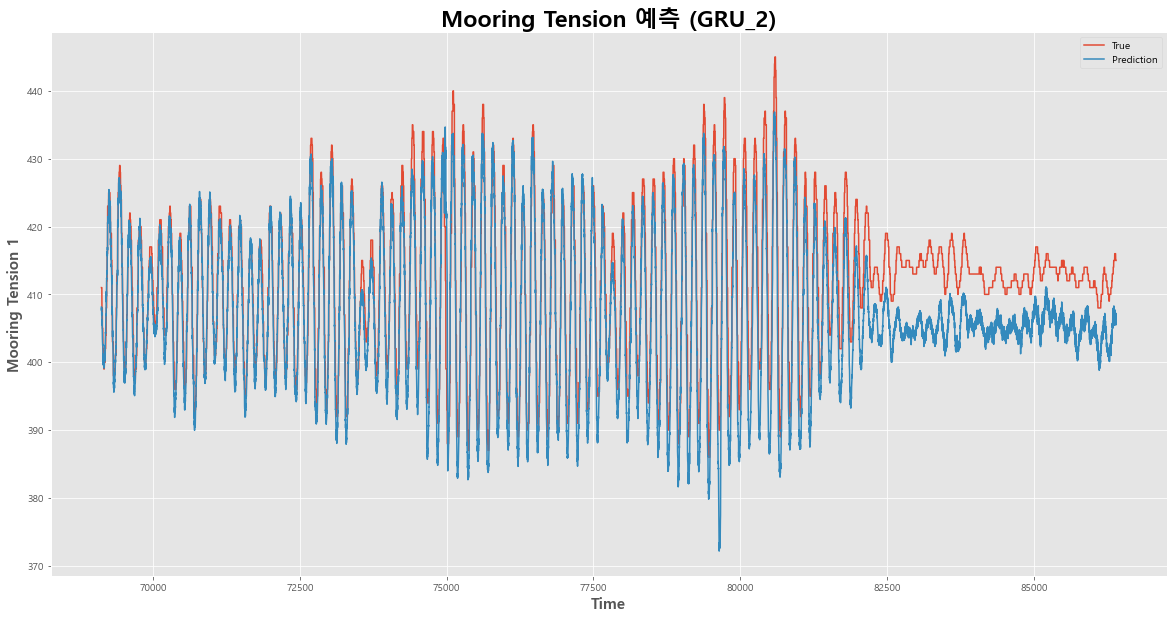

In [222]:
fig = plt.figure(figsize = (20, 10))

ax = fig.add_subplot(111)
ax.plot(x_test.index, y_test, label = 'True')
ax.plot(x_test.index, pred_, label = 'Prediction')
plt.title('Mooring Tension 예측 (GRU_2)', fontdict = {
    'size' : 23,
    'weight' : 'bold',
    'color' : 'k'
})
plt.legend()
plt.xlabel('Time', fontdict = {
    'weight' : 'bold',
    'size' : 15
})
plt.ylabel('Mooring Tension 1',
          fontdict = {
              'weight' : 'bold',
              'size' : 15
          })
plt.show()